Dataset Overview: CardioHealth Risk Assessment Dataset
General Information:
Total Entries: 270
Total Columns: 14
Column Details:
Age: Age of the patient
Sex: Gender of the patient (0 = Female, 1 = Male)
Chest pain type: Type of chest pain (values 1-4)
BP: Blood Pressure
Cholesterol: Cholesterol level
FBS over 120: Fasting blood sugar > 120 mg/dl (0 = False, 1 = True)
EKG results: Results of electro cardiographic test (values 0-2)
Max HR: Maximum heart rate achieved
Exercise angina: Exercise-induced angina (0 = No, 1 = Yes)
ST depression: ST depression induced by exercise relative to rest
Slope of ST: Slope of the peak exercise ST segment (values 1-3)
Number of vessels fluro: Number of major vessels colored by fluoroscopy (values 0-3)
Thallium: Thallium stress test result (values 3, 6, 7)
Heart Disease: Presence or absence of heart disease (Presence, Absence)

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Heart_Disease_Prediction.csv')

In [6]:
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.077778,9.201052,29.0,47.0,54.0,60.75,80.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.00,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.60,6.2


### Data Exploration and Visualization

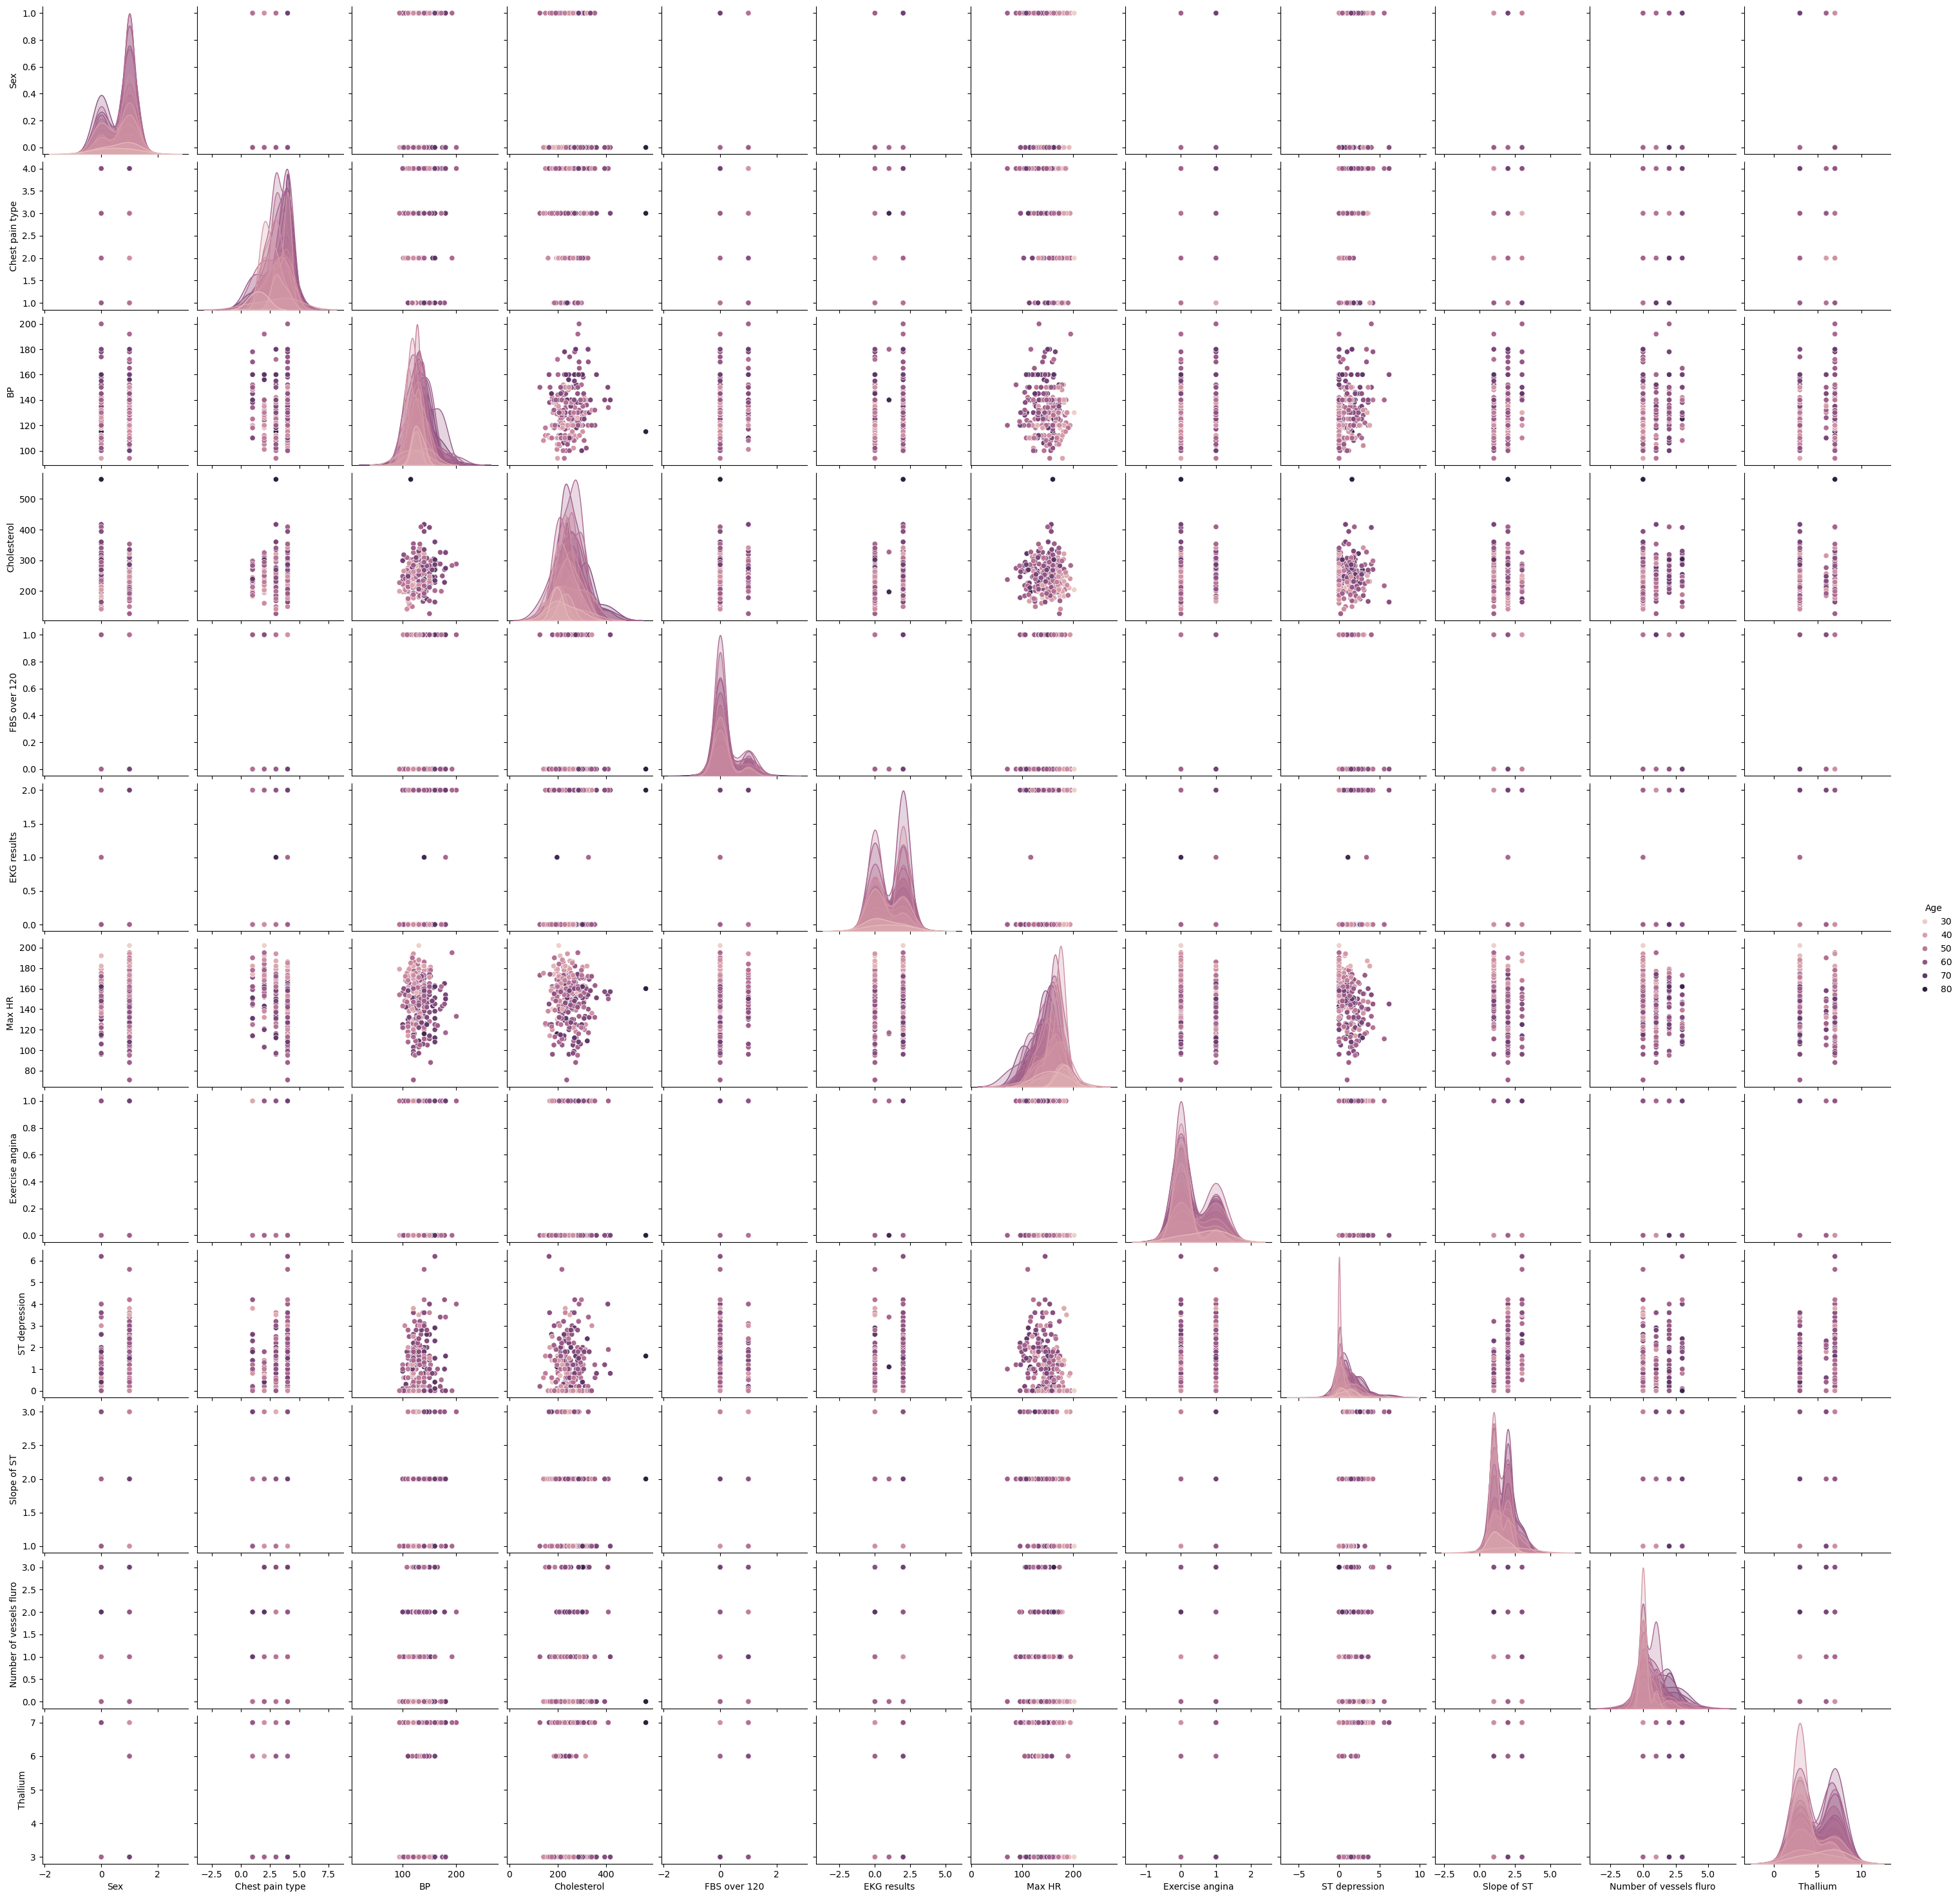

In [30]:
sns.pairplot(df, hue='Age', kind='scatter')

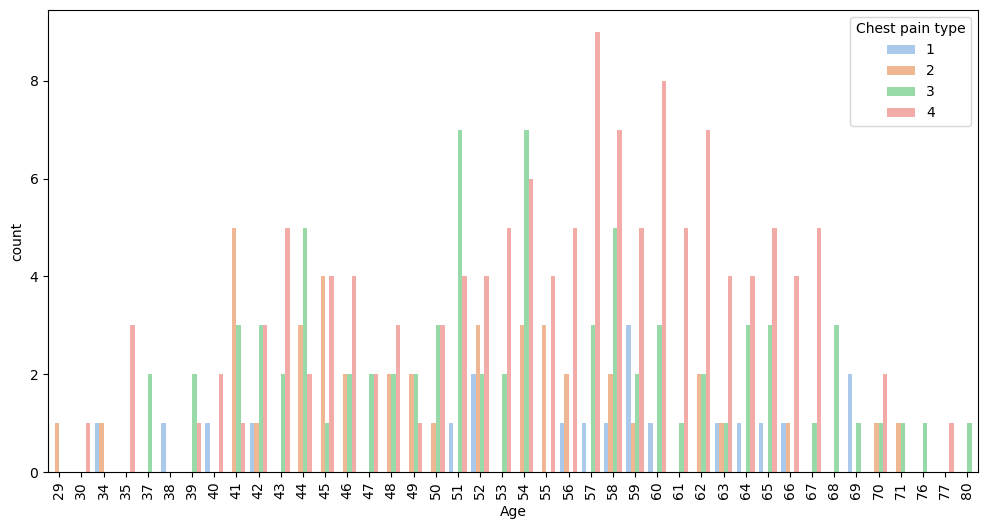

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Chest pain type', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

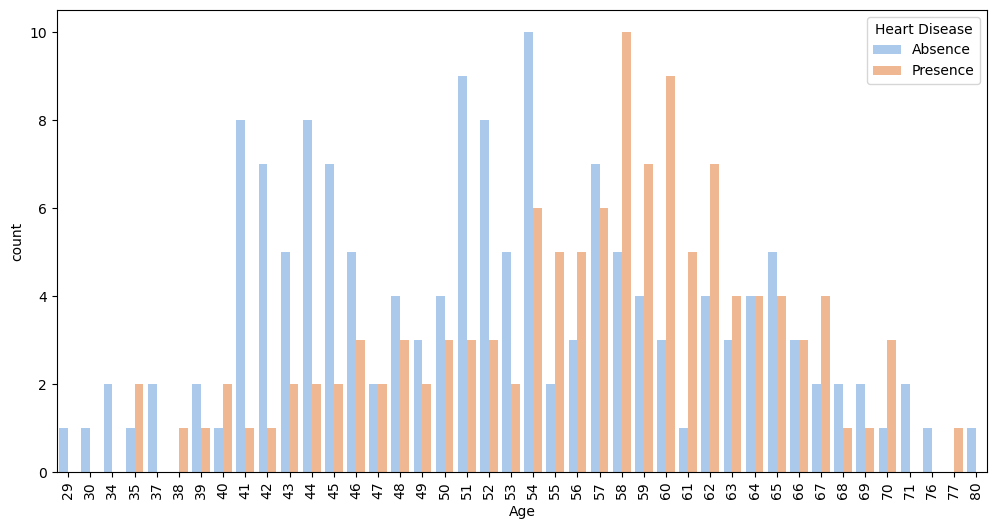

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

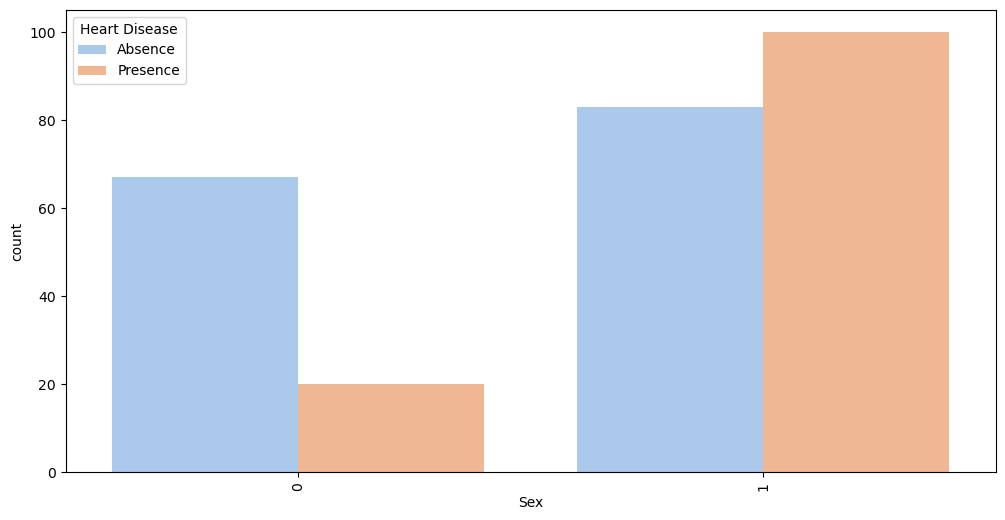

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sex', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

In [285]:
df['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

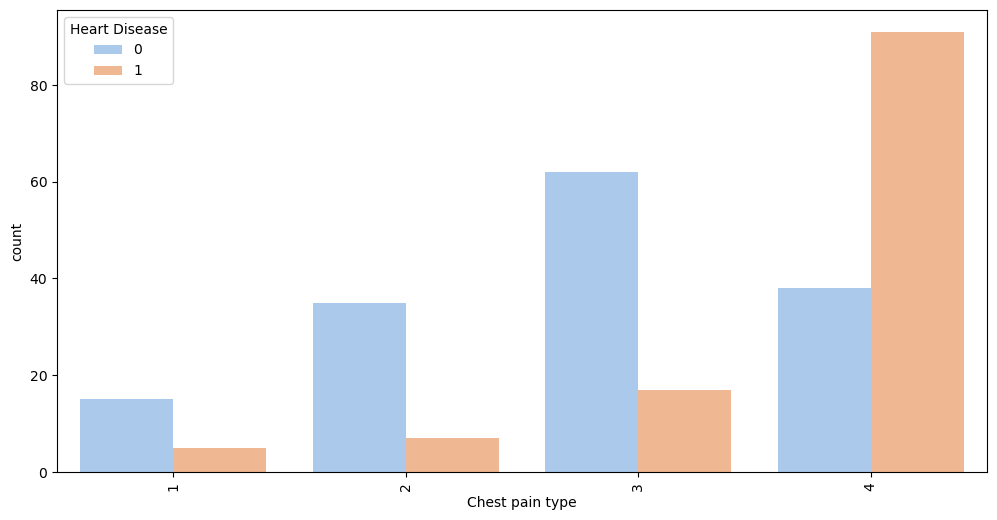

In [289]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Chest pain type', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

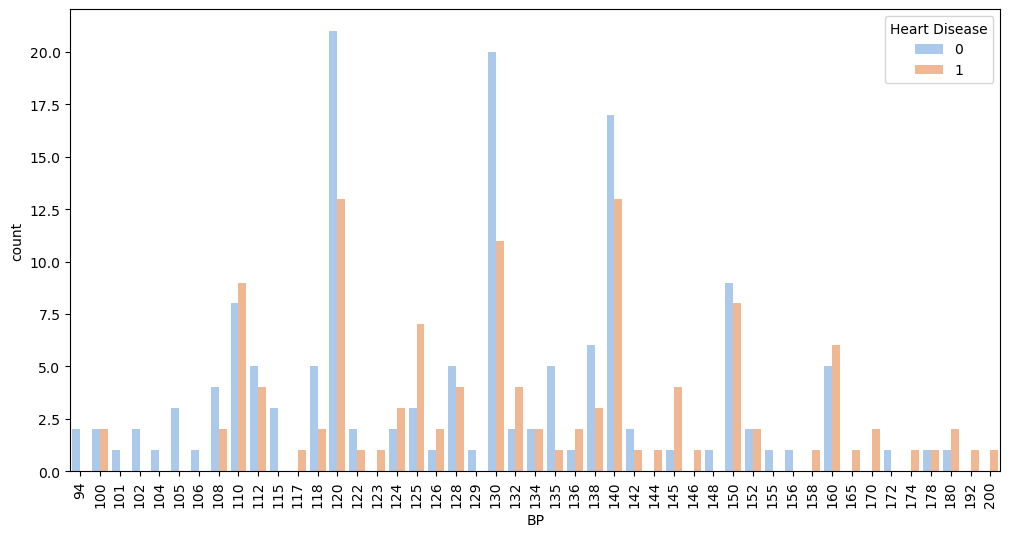

In [291]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BP', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

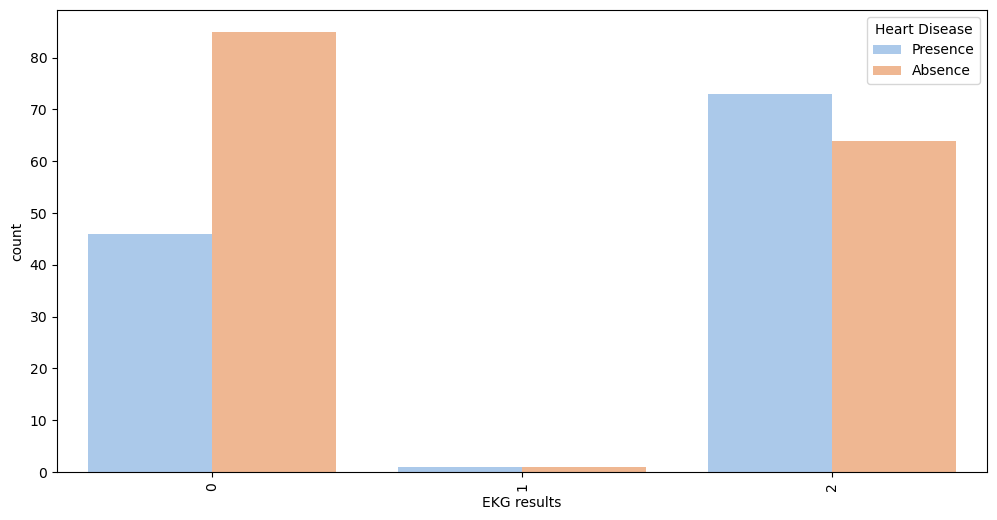

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EKG results', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

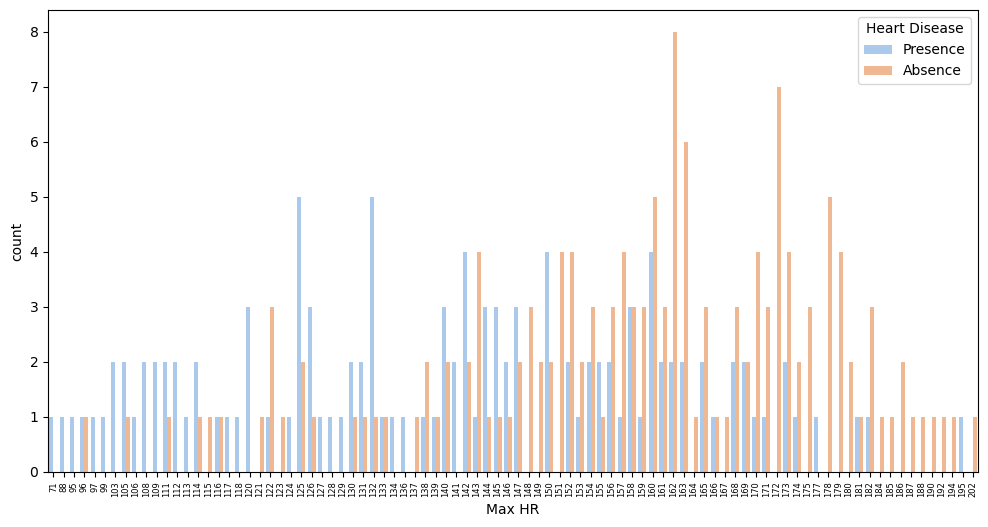

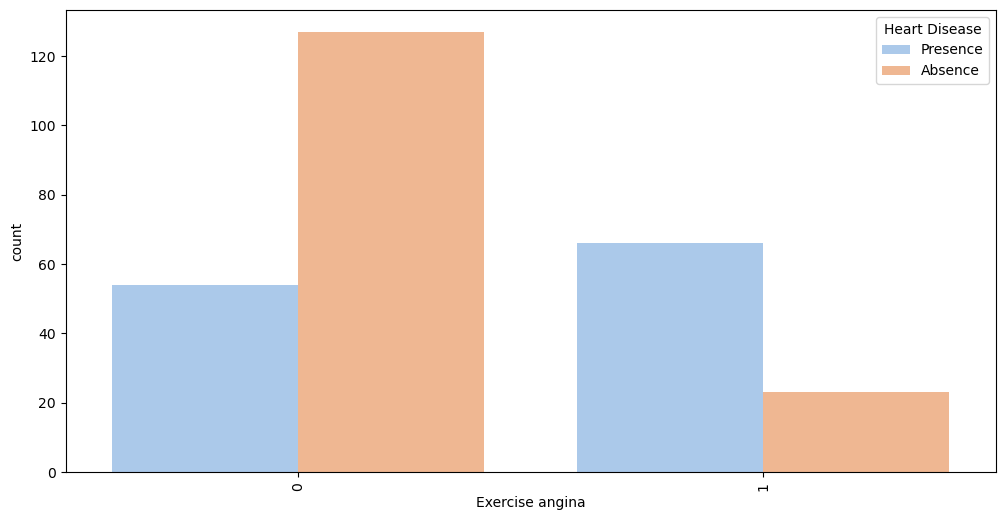

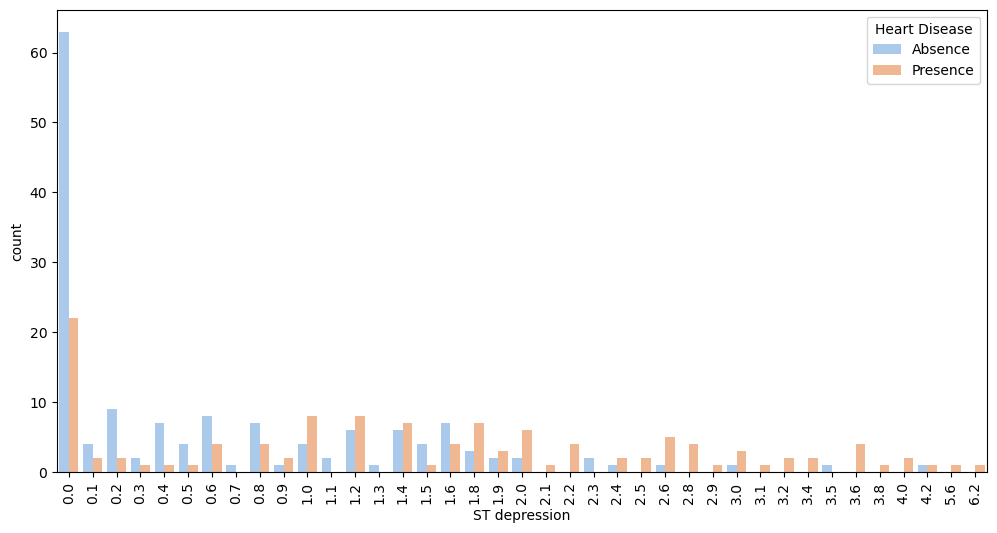

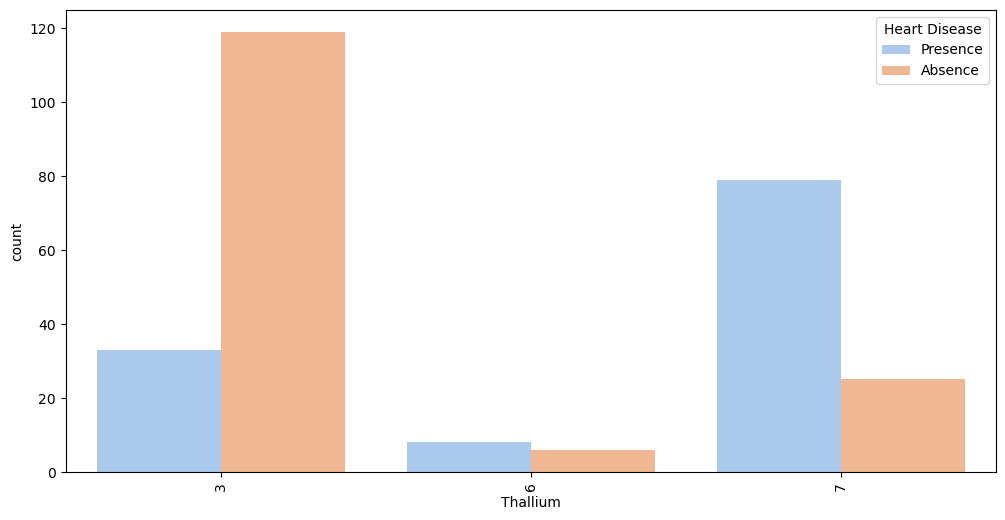

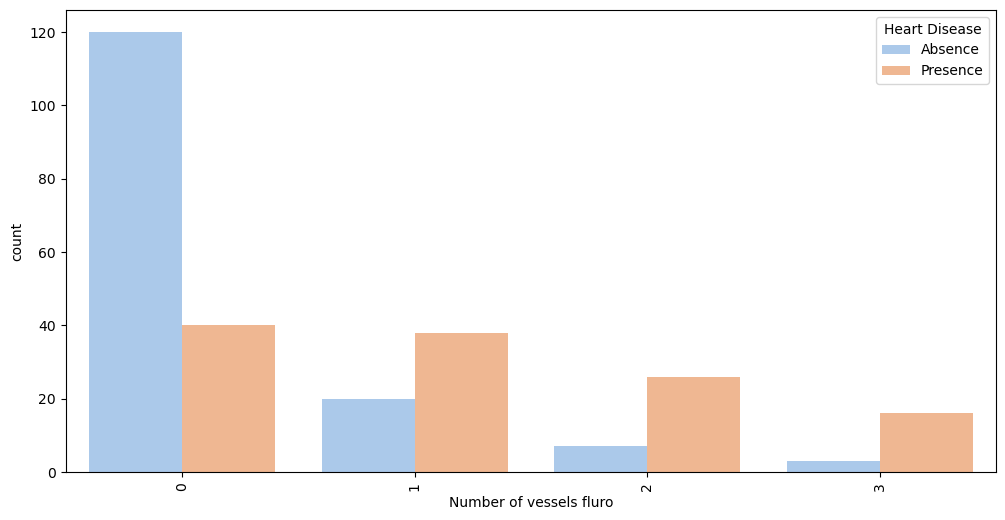

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Max HR', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90, fontsize=6)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Exercise angina', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ST depression', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Thallium', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Number of vessels fluro', hue='Heart Disease', palette="pastel" )
plt.xticks(rotation=90)
plt.show()

### Multicollinearity check


In [92]:
numb_col=df.select_dtypes(include=[np.number])

<Axes: >

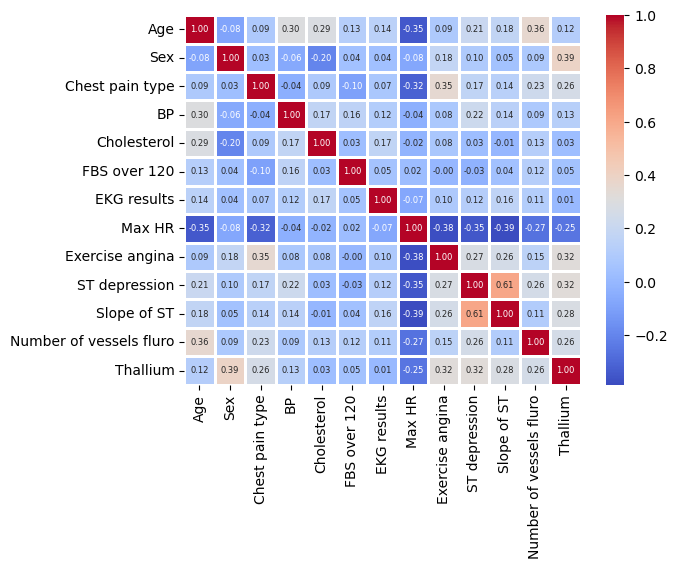

In [112]:
correlation_mat=numb_col.corr()

sns.heatmap(correlation_mat, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.8, annot_kws={'size':6})


In [118]:
correlation_mat


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.084770,0.092851,0.296292,0.285092,0.125882,0.144758,-0.348452,0.091004,0.205487,0.175391,0.359950,0.117915
Sex,-0.084770,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.092851,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.296292,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.285092,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.125882,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.144758,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.348452,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.091004,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.205487,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


#### Age and BP (Blood Pressure): 
A positive correlation (0.296) suggests that as age increases, blood pressure tends to increase. This is common as blood vessels lose elasticity over time.
#### Age and Max HR (Maximum Heart Rate): 
A negative correlation (-0.348) indicates that older individuals tend to have a lower maximum heart rate. This aligns with the general understanding that heart rate decreases with age.
#### Chest Pain Type and Exercise Angina:
A positive correlation (0.353) suggests that certain types of chest pain are more likely to be associated with exercise-induced angina.
#### ST Depression and Slope of ST: 
A strong positive correlation (0.610) means that as ST depression increases, the slope of the ST segment also tends to increase. This can be significant in diagnosing and understanding the severity of heart conditions.
#### Number of Vessels Fluoroscoped and Thallium:
A positive correlation (0.256) indicates that as the number of vessels examined increases, the Thallium score also tends to increase. This could be related to the extent of heart disease.

Multicollinearity occurs when two or more predictor variables are highly correlated, making it difficult to determine the individual effect of each variable.
None of the variables exhibit correlation values near or above 0.7, suggesting that multicollinearity is likely not a major issue in this dataset.

#### Missing value analysis


In [122]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

#### Encoding

In [124]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode the categorical 'Heart Disease' feature

Contract_encoded=LabelEncoder()
df['Heart Disease'] = Contract_encoded.fit_transform(df['Heart Disease'])


df=df.dropna()

In [126]:
## checking if all col. are numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int32  
dtypes: float64(1), int32(1), i

# Train test split

In [184]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Pipeline

In [187]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [189]:
from sklearn.pipeline import Pipeline

# Define the pipelines for each classifier
pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])
}


In [191]:
# Define the parameter grids for each classifier
param_grids = {
    'logistic_regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    'decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200, 300, 400],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10, 20, 30, 40, 50]
    }
}

In [193]:
# Perform grid search cross-validation for each classifier
best_estimators = {}
for name in pipelines.keys():
    grid_search = GridSearchCV(pipelines[name], param_grids[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for logistic_regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}
Best parameters for decision_tree: {'classifier__max_depth': 50, 'classifier__min_samples_split': 5}
Best parameters for random_forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 40, 'classifier__n_estimators': 200}


#### Model evaluation

In [195]:
# Evaluate the best models on the test set and generate classification reports
best_model_name = None
best_model_accuracy = 0
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_model_accuracy:
        best_model_accuracy = accuracy
        best_model_name = name

    best_model = best_estimators[best_model_name]
    
    print(f"\nAccuracy of {name}: {accuracy:.3f}")
    print(f"\nClassification Report for {name}:\n{classification_report(y_test, y_pred)}")

    test_score = accuracy * 100
    train_score = accuracy_score(y_train, model.predict(X_train)) * 100
    print(f"\ntest_score of {name}: {test_score:.3f}\n")
    print(f"\ntrain_score of {name}: {train_score:.3f}\n")

    
    


Accuracy of logistic_regression: 0.889

Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.86      0.86      0.86        21

    accuracy                           0.89        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54


test_score of logistic_regression: 88.889


train_score of logistic_regression: 83.796


Accuracy of decision_tree: 0.667

Classification Report for decision_tree:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        33
           1       0.56      0.71      0.62        21

    accuracy                           0.67        54
   macro avg       0.67      0.68      0.66        54
weighted avg       0.69      0.67      0.67        54


test_score of decision_tree: 66.667


train_score of decision_tree: 97.685


Accuracy of ran

Accuracy: The proportion of all predictions that are correct

Precision: The proportion of positive predictions that are correct

Recall (Sensitivity): The proportion of true positives detected

1-Score: The harmonic mean of precision and recall

In [197]:
#best model with accuracy
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy}")

The best model is logistic_regression with an accuracy of 0.8888888888888888


#### Prediction

In [199]:
sample_data = df.sample(n=5, random_state=42)

In [201]:
X_new = sample_data.drop(columns=['Heart Disease'])
y_new = sample_data['Heart Disease']


### Note:: 
#### Comparison
##### Logistic Regression:
######  Train Score: 83.796%
######  Test Score: 88.889%
This model has a slightly lower training score than Random Forest, indicating it may be simpler and less prone to overfitting. Logistic Regression can be advantageous if interpretability is important, as it provides straightforward feature coefficients.

##### Random Forest:
######  Train Score: 87.500%
######  Test Score: 88.889%
Random Forest’s higher training score suggests it captures more complex patterns, potentially leading to slightly better generalization, though this advantage may not be significant given similar test scores. Random Forest can also provide feature importance insights, which can help with understanding influential features.500796

In [268]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=1, solver='liblinear'))])

## Best model is logistic regression but, As Random forest is doing well with both train and test score, I decided to apply random forest ## 

In [274]:
best_estimators['random_forest']

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_split=40,
                                        n_estimators=200))])

In [278]:
sample_pred = best_estimators['random_forest'].predict(X_new)
accu = accuracy_score(y_new, sample_pred)
comparison_df = pd.DataFrame({
        'True Values': y_new,
        'Predicted Values': sample_pred
        })
# Display the first few rows of true vs predicted values
print(comparison_df.head())


     True Values  Predicted Values
30             1                 1
116            1                 1
79             0                 0
127            0                 0
196            0                 0


#### Prediction for data outside df

In [247]:
data= [{'Age':45, 'Sex':0, 'Chest pain type':3, 'BP':120, 
    'Cholesterol':270, 'FBS over 120':0, 'EKG results':2, 'Max HR':121,
    'Exercise angina':1,'ST depression':0.2, 'Slope of ST':1,  'Number of vessels fluro':1,'Thallium':3}]                  
                 


In [259]:
new_data = pd.DataFrame(data)
new_data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,45,0,3,120,270,0,2,121,1,0.2,1,1,3


In [280]:
preds = best_estimators['random_forest'].predict(new_data)

In [282]:

print("Predicted Heart Disease:", preds)
print('\ninterpretation of value')
print('\n 0 heart disease not present\n 1  presence of heart disease\n')

Predicted Heart Disease: [0]

interpretation of value

 0 heart disease not present
 1  presence of heart disease



# Thank you